In [1]:
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from model.losses import SmoothPinballLoss
from model.model import QuantileNet
from data.preprocessing import FrameTorch
from model.trainer import Trainer

#### Import data

In [2]:
PATH_DATA = Path.cwd().parent / 'data' / 'files'

data = pd.read_csv((PATH_DATA / 'data.csv'), index_col='time')

#### PREPARE DATA AND MODEL

In [4]:
# intialize frametorch
frametorch = FrameTorch(data)
# split data
frametorch.split_data()
# scale data
frametorch.scale_data(method=MinMaxScaler)

# train, val and test loaders
train_loader, val_loader, test_loader = frametorch.data_to_loader()

In [6]:
# quantiles to predict
quantiles = torch.tensor([0.025, 0.05, 0.1, 0.15, 0.85, 0.9, 0.95, 0.975])

# number of inputs and outputs
n_inputs = frametorch.data.shape[1] - 1
n_outputs = len(quantiles)

In [8]:
# model
quantilenet = QuantileNet(n_inputs=n_inputs, n_outputs=n_outputs)
# criterion to use
criterion = SmoothPinballLoss(quantiles)
# optimizer
optimizer = optim.SGD(quantilenet.parameters(), lr=0.003)
# trainer class
trainer = Trainer(quantilenet, criterion, optimizer)

#### TRAIN DE MODEL

In [10]:
quantilenet = trainer.fit(train_loader, val_loader, epochs=1000, patience=100)

epoch: 0 train loss: 0.73 val loss: 0.4
epoch: 1 train loss: 0.41 val loss: 0.29
epoch: 2 train loss: 0.29 val loss: 0.26
epoch: 3 train loss: 0.26 val loss: 0.26
epoch: 4 train loss: 0.26 val loss: 0.25
epoch: 5 train loss: 0.25 val loss: 0.25
epoch: 6 train loss: 0.25 val loss: 0.24
epoch: 7 train loss: 0.24 val loss: 0.24
epoch: 8 train loss: 0.23 val loss: 0.23
epoch: 9 train loss: 0.23 val loss: 0.23
epoch: 10 train loss: 0.22 val loss: 0.22
epoch: 11 train loss: 0.22 val loss: 0.22
epoch: 12 train loss: 0.21 val loss: 0.21
epoch: 13 train loss: 0.2 val loss: 0.2
epoch: 14 train loss: 0.2 val loss: 0.19
epoch: 15 train loss: 0.19 val loss: 0.19
epoch: 16 train loss: 0.18 val loss: 0.18
epoch: 17 train loss: 0.17 val loss: 0.17
epoch: 18 train loss: 0.17 val loss: 0.17
epoch: 19 train loss: 0.16 val loss: 0.16
epoch: 20 train loss: 0.16 val loss: 0.16
epoch: 21 train loss: 0.15 val loss: 0.15
epoch: 22 train loss: 0.15 val loss: 0.15
epoch: 23 train loss: 0.15 val loss: 0.15
epoch:

epoch: 194 train loss: 0.11 val loss: 0.12
epoch: 195 train loss: 0.11 val loss: 0.12
epoch: 196 train loss: 0.11 val loss: 0.12
epoch: 197 train loss: 0.11 val loss: 0.12
epoch: 198 train loss: 0.11 val loss: 0.12
epoch: 199 train loss: 0.11 val loss: 0.12
epoch: 200 train loss: 0.11 val loss: 0.12
epoch: 201 train loss: 0.11 val loss: 0.12
epoch: 202 train loss: 0.11 val loss: 0.12
epoch: 203 train loss: 0.11 val loss: 0.12
epoch: 204 train loss: 0.11 val loss: 0.12
epoch: 205 train loss: 0.11 val loss: 0.12
epoch: 206 train loss: 0.11 val loss: 0.12
epoch: 207 train loss: 0.11 val loss: 0.12
epoch: 208 train loss: 0.11 val loss: 0.12
epoch: 209 train loss: 0.11 val loss: 0.12
epoch: 210 train loss: 0.11 val loss: 0.12
epoch: 211 train loss: 0.11 val loss: 0.11
epoch: 212 train loss: 0.11 val loss: 0.11
epoch: 213 train loss: 0.11 val loss: 0.11
epoch: 214 train loss: 0.11 val loss: 0.11
epoch: 215 train loss: 0.11 val loss: 0.11
epoch: 216 train loss: 0.11 val loss: 0.11
epoch: 217 

epoch: 389 train loss: 0.1 val loss: 0.11
epoch: 390 train loss: 0.1 val loss: 0.11
epoch: 391 train loss: 0.1 val loss: 0.11
epoch: 392 train loss: 0.1 val loss: 0.11
epoch: 393 train loss: 0.1 val loss: 0.11
epoch: 394 train loss: 0.1 val loss: 0.11
epoch: 395 train loss: 0.1 val loss: 0.11
epoch: 396 train loss: 0.1 val loss: 0.11
epoch: 397 train loss: 0.1 val loss: 0.11
epoch: 398 train loss: 0.1 val loss: 0.11
epoch: 399 train loss: 0.1 val loss: 0.11
epoch: 400 train loss: 0.1 val loss: 0.11
epoch: 401 train loss: 0.1 val loss: 0.11
epoch: 402 train loss: 0.1 val loss: 0.11
epoch: 403 train loss: 0.1 val loss: 0.11
epoch: 404 train loss: 0.1 val loss: 0.11
epoch: 405 train loss: 0.1 val loss: 0.11
epoch: 406 train loss: 0.1 val loss: 0.11
epoch: 407 train loss: 0.1 val loss: 0.11
epoch: 408 train loss: 0.1 val loss: 0.11
epoch: 409 train loss: 0.1 val loss: 0.11
epoch: 410 train loss: 0.1 val loss: 0.11
epoch: 411 train loss: 0.1 val loss: 0.11
epoch: 412 train loss: 0.1 val los

epoch: 584 train loss: 0.09 val loss: 0.1
epoch: 585 train loss: 0.09 val loss: 0.1
epoch: 586 train loss: 0.09 val loss: 0.1
epoch: 587 train loss: 0.09 val loss: 0.1
epoch: 588 train loss: 0.09 val loss: 0.1
epoch: 589 train loss: 0.09 val loss: 0.1
epoch: 590 train loss: 0.09 val loss: 0.1
epoch: 591 train loss: 0.09 val loss: 0.1
epoch: 592 train loss: 0.09 val loss: 0.1
epoch: 593 train loss: 0.09 val loss: 0.1
epoch: 594 train loss: 0.09 val loss: 0.1
epoch: 595 train loss: 0.09 val loss: 0.1
epoch: 596 train loss: 0.09 val loss: 0.1
epoch: 597 train loss: 0.09 val loss: 0.1
epoch: 598 train loss: 0.09 val loss: 0.1
epoch: 599 train loss: 0.09 val loss: 0.1
epoch: 600 train loss: 0.09 val loss: 0.1
epoch: 601 train loss: 0.09 val loss: 0.1
epoch: 602 train loss: 0.09 val loss: 0.1
epoch: 603 train loss: 0.09 val loss: 0.1
epoch: 604 train loss: 0.09 val loss: 0.1
epoch: 605 train loss: 0.09 val loss: 0.1
epoch: 606 train loss: 0.09 val loss: 0.1
epoch: 607 train loss: 0.09 val lo

epoch: 780 train loss: 0.09 val loss: 0.1
epoch: 781 train loss: 0.09 val loss: 0.1
epoch: 782 train loss: 0.09 val loss: 0.1
epoch: 783 train loss: 0.09 val loss: 0.1
epoch: 784 train loss: 0.09 val loss: 0.1
epoch: 785 train loss: 0.09 val loss: 0.1
epoch: 786 train loss: 0.09 val loss: 0.1
epoch: 787 train loss: 0.09 val loss: 0.1
epoch: 788 train loss: 0.09 val loss: 0.1
epoch: 789 train loss: 0.09 val loss: 0.1
epoch: 790 train loss: 0.09 val loss: 0.1
epoch: 791 train loss: 0.09 val loss: 0.1
epoch: 792 train loss: 0.09 val loss: 0.1
epoch: 793 train loss: 0.09 val loss: 0.1
epoch: 794 train loss: 0.09 val loss: 0.1
epoch: 795 train loss: 0.09 val loss: 0.1
epoch: 796 train loss: 0.09 val loss: 0.1
epoch: 797 train loss: 0.09 val loss: 0.1
epoch: 798 train loss: 0.09 val loss: 0.1
epoch: 799 train loss: 0.09 val loss: 0.1
epoch: 800 train loss: 0.09 val loss: 0.1
epoch: 801 train loss: 0.09 val loss: 0.1
epoch: 802 train loss: 0.09 val loss: 0.1
epoch: 803 train loss: 0.09 val lo

epoch: 976 train loss: 0.09 val loss: 0.1
epoch: 977 train loss: 0.09 val loss: 0.1
epoch: 978 train loss: 0.09 val loss: 0.1
epoch: 979 train loss: 0.09 val loss: 0.1
epoch: 980 train loss: 0.09 val loss: 0.1
epoch: 981 train loss: 0.09 val loss: 0.1
epoch: 982 train loss: 0.09 val loss: 0.1
epoch: 983 train loss: 0.09 val loss: 0.1
epoch: 984 train loss: 0.09 val loss: 0.1
epoch: 985 train loss: 0.09 val loss: 0.1
epoch: 986 train loss: 0.09 val loss: 0.1
epoch: 987 train loss: 0.09 val loss: 0.1
epoch: 988 train loss: 0.09 val loss: 0.1
epoch: 989 train loss: 0.09 val loss: 0.1
epoch: 990 train loss: 0.09 val loss: 0.1
epoch: 991 train loss: 0.09 val loss: 0.1
epoch: 992 train loss: 0.09 val loss: 0.1
epoch: 993 train loss: 0.09 val loss: 0.1
epoch: 994 train loss: 0.09 val loss: 0.1
epoch: 995 train loss: 0.09 val loss: 0.1
epoch: 996 train loss: 0.09 val loss: 0.1
epoch: 997 train loss: 0.09 val loss: 0.1
epoch: 998 train loss: 0.09 val loss: 0.1
epoch: 999 train loss: 0.09 val lo

#### TRAINING CONVERGENCE

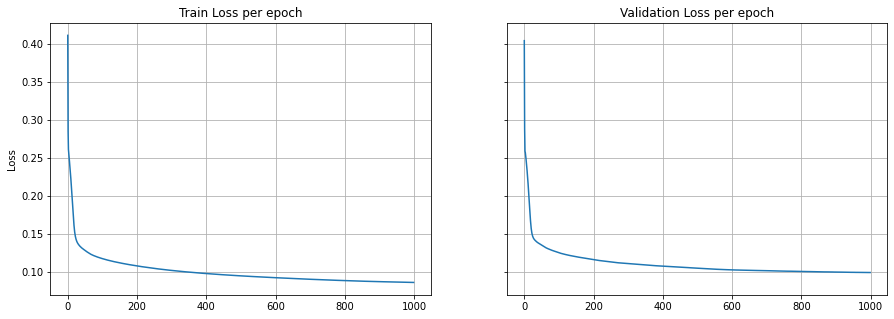

In [12]:
loss_ss = pd.Series(trainer.train_losses[1:])
validations_losses_ss = pd.Series(trainer.val_losses)

fig, ax = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

loss_ss.plot(ax=ax[0])
validations_losses_ss.plot(ax=ax[1])
ax[0].set_ylabel('Loss')
ax[0].set_title('Train Loss per epoch')
ax[1].set_title('Validation Loss per epoch')
ax[0].grid()
ax[1].grid()

#### VALIDATION SCORE AND PREDICTIONS

In [13]:
# validation input and target
inputs, target = frametorch.data_val[:, :-1], frametorch.data_val[:, -1:]
inputs = torch.tensor(inputs, dtype=torch.float32)
target = torch.tensor(target, dtype=torch.float32)

# predictions to pandas
y_pred = quantilenet(inputs)
y_test = pd.Series(target.squeeze().tolist())
y_preds = pd.DataFrame(y_pred.tolist())

# final validation loss
criterion(y_pred, target)

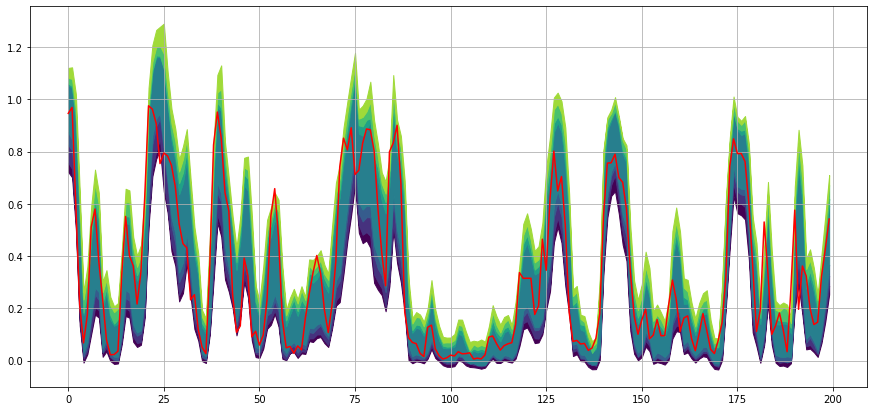

In [16]:
viridis = cm.get_cmap('viridis', len(quantiles))

plt.figure(figsize=(15, 7))

for i in range(len(y_preds.columns)-1):
    plt.fill_between(y_preds.index[:200], y_preds[i][:200], y_preds[i+1][:200], color=viridis.colors[i])

y_test[:200].plot(color='red')
plt.grid()